In [5]:
from empiricaldist import Pmf
import numpy as np
hypos = np.linspace(0, 1, 101)
prior = Pmf(np.ones_like(hypos), hypos)


In [8]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [21]:
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}
dataset = 'H' * 140 + 'T' * 110

def update_euro(pmf, dataset):
    for data in dataset:
        for hypo in pmf.qs:
            pmf[hypo] *= likelihood[data][hypo]
        pmf.normalize()



hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
posterior = prior.copy()
update_euro(posterior,dataset)

In [22]:
unifor = Pmf(1, hypos, name = 'un')

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [36]:
from empiricaldist import Pmf
import numpy as np

# Create a triangular shape from 0 up to 50 and back to 0 at 100
ramp_up = np.arange(51)       # 0 to 50
ramp_down = np.arange(49, -1, -1)  # 49 to 0
triangle_values = np.concatenate([ramp_up, ramp_down])  # total 100 values

# Hypotheses from 0 to 100 (length 100)
hypos = np.arange(101)

# Create PMF
triangle = Pmf(triangle_values, hypos)
triangle.normalize()


2500

In [37]:
update_euro(uniform, dataset)


In [38]:
update_euro(triangle, dataset)

In [40]:
from scipy.stats import binom
def update_binomial(pmf, data):
    '''Update pmf using the binomial distribution'''
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [41]:
uniform2 = Pmf(1, hypos, name = 'uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [44]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1/ hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
data = 60
posterior = prior.copy()
update_train(posterior, data)

np.sum(posterior.ps * posterior.qs)

333.41989326370776

In [45]:
posterior.mean()

333.41989326370776

In [46]:
alpha = 1.0
ps = hypos **(-alpha)
power = Pmf(ps, hypos, name ='power law')
power.normalize()

hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name = 'uniform')
uniform.normalize()

1000

In [ ]:
def quantile(pmf, prob):
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob
            return q
        return np.nan

In [ ]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1200)
prior = Pmf(1, hypos)
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1/ hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
data = 60, 60
posterior = prior.copy()
update_train(posterior, data)

np.sum(posterior.ps * posterior.qs)

Mean estimate: 486.2
P(n > 1200):0.0112


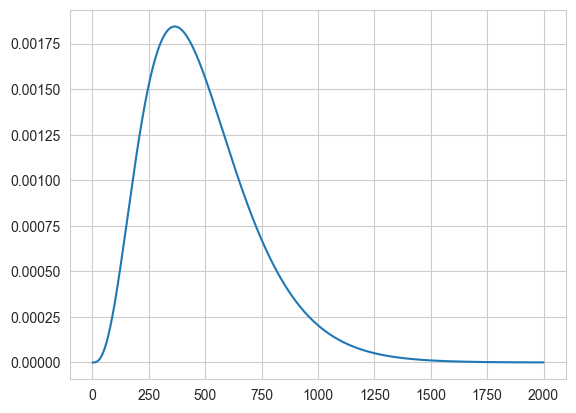

In [64]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom
hypos = np.arange(1, 2001)
uniform = Pmf(1, hypos, name = 'uniform')

def update_binomial(pmf, k):
    """Update a PMF using the binomial likelihood for one birthday observation."""
    xs = pmf.qs  # hypotheses: number of people
    p = 1 / 365  # birthday probability
    likelihood = binom.pmf(k, xs, p)  # vectorized over all hypotheses
    pmf *= likelihood
    pmf.normalize()


data_points = [2, 1, 0]
posterior = uniform.copy()

for k in data_points:
    update_binomial(posterior, k)

posterior.mean(), posterior.credible_interval(0.9)
posterior.plot(label = "Posteriory PMF")
print(f"Mean estimate: {posterior.mean():.1f}")
print(f"P(n > 1200):{posterior[posterior.qs > 1200].sum():.4f}")


In [108]:
from empiricaldist import Pmf
from scipy.stats import binom
import numpy as np
from scipy.special import comb
from sympy import S
from sympy.functions.combinatorial.numbers import stirling

def prob_unique(q, n, N):
    """Compute P(q unique rabbits in n sightings | N total rabbits)."""
    from scipy.special import comb
    return float(stirling(n, q, kind=2)) * comb(N, q) * np.math.factorial(q) / (N**n)


# Hypotheses: total number of rabbits (between 4 and 10)
hypos = np.arange(4, 11)
dist = Pmf(1, hypos, name='Uniform')
dist.normalize()

def prob_unique(q, n, N):
    """Compute P(q unique rabbits in n sightings | N total rabbits)."""
    from scipy.special import comb
    return float(stirling(n, q, kind=2)) * comb(N, q) * np.math.factorial(q) / (N**n)

def update_rabbits(pmf, q, n):
    '''Update based on q distinct rabbits observed in n sightings.'''
    xs = pmf.qs
    likelihood = np.array([prob_unique(q, n, N) if N >= q else 0 for N in xs])
    pmf *= likelihood
    pmf.normalize()

update_rabbits(dist, 2, 3)

In [110]:
dist

,probs
4,0.206730
5,0.176410
6,0.153134
7,0.135008
8,0.120593
9,0.108895
10,0.099231


In [119]:
import numpy as np
from empiricaldist import Pmf

# 1. Actual sentence lengths and their equal prior probability
sentences = np.array([1, 2, 3])
prior = Pmf(1, sentences)
prior.normalize()

# 2. Construct observed distribution by weighting by sentence length (length bias)
# P(observed) ∝ sentence_length × P(length)
biased = prior * sentences
biased.normalize()

# 3. What's the probability the observed prisoner has a 3-year sentence?
prob_3_years = biased[3]

# 4. What's the expected remaining sentence length?
expected_remaining = biased.mean()

# Display results
print("Observed distribution:", biased)
print("P(3-year sentence | observed):", prob_3_years)
print("Expected remaining sentence length:", expected_remaining)


Observed distribution: 1    0.166667
2    0.333333
3    0.500000
dtype: float64
P(3-year sentence | observed): 0.5
Expected remaining sentence length: 2.333333333333333


In [124]:
import numpy as np

# Family sizes: assume 4+ as 4.5
children = np.array([1, 2, 3, 4.5])
frequencies = np.array([22, 41, 24, 14])  # from 2014 data

# Convert to probabilities
prob = frequencies / frequencies.sum()

# Expected number of children
expected_children = np.sum(children * prob)
print(f"Expected number of children: {expected_children:.2f}")


Expected number of children: 2.37


In [125]:
prob

array([0.21782178, 0.40594059, 0.23762376, 0.13861386])

In [141]:
from empiricaldist import Pmf
import numpy as np

# Total possible population sizes (in billions)
lengths = np.array([200e9, 2000e9])
prior = Pmf(1, lengths)
prior.normalize()


2

In [142]:
# Data: you are the 108-billionth person
d = 108e9

# Likelihood: P(d | N) = 1 / N for each hypothesis
likelihood = 1 / lengths

# Bayesian update: multiply prior by likelihood
posterior = prior * likelihood
posterior.normalize()

# Results
print(posterior)
print(f"P(short-lived civilization): {posterior[200e9]:.3f}")
print(f"P(long-lived civilization):  {posterior[2000e9]:.3f}")


2.000000e+11    0.909091
2.000000e+12    0.090909
dtype: float64
P(short-lived civilization): 0.909
P(long-lived civilization):  0.091


In [140]:
posterior

,probs
0,0.5
1,0.5


In [148]:
def odds(p):
    return p/ (1 - p)
def prob(o):
    return o / (o + 1)

def prob2(yes, no):
    return yes / (yes + no)

In [149]:
odds(0.9)

9.000000000000002

In [150]:
prob2(3, 2)

0.6

In [155]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds
post_prob = prob(post_odds)
post_prob

0.6

In [156]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

In [157]:
post_prob = prob(post_odds)
post_prob

0.42857142857142855

In [10]:

# Prob of AB blud
like1 =0.01
# Prob of O and AB blood
like2 = 2* 0.6 * 0.01

likelihood_ratio = like1 / like2
prior = 0.1
posterior = (0.1 * like1) / (like1 * 0.1 + like2 * 0.9)

In [11]:
posterior

0.0847457627118644

In [23]:
import numpy as np
from empiricaldist import Pmf
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/ sides, outcomes)
    return die

die1 = make_die(6)
die2 = make_die(6)
def add_dist(pmf1, pmf2):
    '''Compute dist sum'''
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

In [24]:
add_dist(die1, die2)

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [25]:
twice = die.add_dist(die)

In [28]:
third = die.add_dist(twice)

In [35]:
def add_dist_seq(seq):
    '''Compute PMF of the sum of values from seq'''
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total
dice = [die] * 3
thrice = add_dist_seq(dice)
thrice

,probs
3,0.004630
4,0.013889
5,0.027778
6,0.046296
7,0.069444
8,0.097222
9,0.115741
10,0.125000
11,0.125000
12,0.115741


<Axes: >

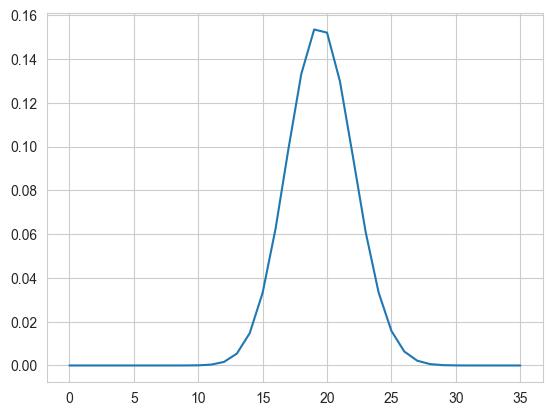

In [40]:
from scipy.stats import binom
# Gluten problem
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

def make_binomial(n, p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive =  make_binomial(num_insensitive, 0.4)

dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
dist_total.plot()

In [41]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive]= dist_total

In [42]:
table

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41
3,3.333724e-05,9.326490e-06,2.205654e-06,4.377061e-07,7.398116e-08,1.107854e-08,1.517139e-09,1.942513e-10,2.361331e-11,2.754929e-12,...,2.784933e-29,2.596024e-30,2.410204e-31,2.229314e-32,2.054801e-33,1.887764e-34,1.728997e-35,1.579030e-36,1.438169e-37,1.306534e-38
4,1.777986e-04,6.138285e-05,1.841174e-05,4.734794e-06,1.038280e-06,1.962745e-07,3.288580e-08,5.013120e-09,7.095823e-10,9.468298e-11,...,3.089268e-27,2.998031e-28,2.893328e-29,2.777860e-30,2.654159e-31,2.524558e-32,2.391168e-33,2.255871e-34,2.120317e-35,1.985931e-36
5,7.349009e-04,3.018343e-04,1.100679e-04,3.516772e-05,9.735214e-06,2.324362e-06,4.825409e-07,8.893885e-08,1.487596e-08,2.300046e-09,...,2.625799e-25,2.657313e-26,2.669827e-27,2.664447e-28,2.642506e-29,2.605500e-30,2.555030e-31,2.492754e-32,2.420339e-33,2.339427e-34
6,2.449670e-03,1.166509e-03,5.017349e-04,1.926402e-04,6.524544e-05,1.930163e-05,4.967015e-06,1.118648e-06,2.241232e-07,4.069717e-08,...,1.778044e-23,1.879740e-24,1.969392e-25,2.046120e-26,2.109354e-27,2.158822e-28,2.194522e-29,2.216697e-30,2.225798e-31,2.222456e-32
7,6.765755e-03,3.664784e-03,1.817882e-03,8.174769e-04,3.296398e-04,1.179075e-04,3.707520e-05,1.020827e-05,2.472467e-06,5.337693e-07,...,9.845585e-22,1.089458e-22,1.192377e-23,1.291828e-24,1.386430e-25,1.474947e-26,1.556306e-27,1.629609e-28,1.694146e-29,1.749390e-30
8,1.578676e-02,9.584819e-03,5.389388e-03,2.782444e-03,1.306449e-03,5.521955e-04,2.079864e-04,6.922909e-05,2.028388e-05,5.249217e-06,...,4.540872e-20,5.270313e-21,6.037411e-22,6.832985e-23,7.647119e-24,8.469449e-25,9.289453e-26,1.009672e-26,1.088121e-27,1.163344e-28
9,3.157352e-02,2.123695e-02,1.335278e-02,7.790967e-03,4.183818e-03,2.049065e-03,9.064073e-04,3.586930e-04,1.259812e-04,3.911510e-05,...,1.767694e-18,2.156914e-19,2.591645e-20,3.070074e-21,3.589304e-22,4.145417e-23,4.733581e-24,5.348169e-25,5.982914e-26,6.631063e-27


In [46]:
likelihood1 = table.loc[12]

hypos = np.arange(n+1)
prior = Pmf(1, hypos)

posterior1 = prior * likelihood1
posterior1.normalize()



0.47547416486151317

In [47]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887378

<Axes: title={'center': 'Posteriory dist '}>

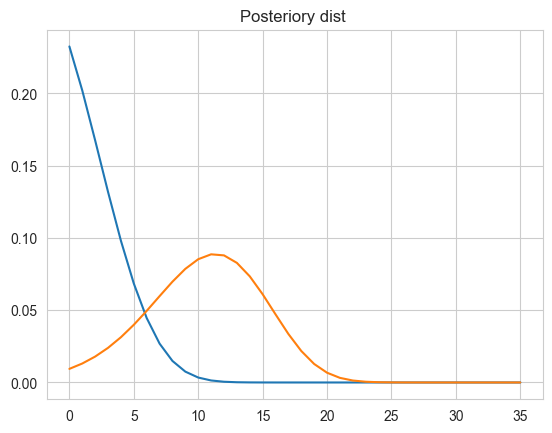

In [53]:
import matplotlib.pyplot as plt
plt.figure()
posterior1.plot()
posterior2.plot(title = 'Posteriory dist ')




In [69]:
prior = [1/3, 2/3]
title = ['Identical', "Not_Identical"]
post0 = Pmf(prior, title)
likelihoods1 = [2, 1]
likelihoods2 = [1.25, 1]

post1 = post0 * likelihoods1
post1.normalize()

post2 = post1 * likelihoods2
post2.normalize()
post2

,probs
Identical,0.555556
Not_Identical,0.444444


In [75]:
prior = [0.1, 0.9]
title = ["Rain", "No_Rain"]

post0 = Pmf(prior, title)
likelihood1 =likelihood2 = likelihood3 = [2/3, 1/3]
post1 = (post0 * likelihood1)
post1.normalize()
post2 = (post1 * likelihood2)
post2.normalize()
post3 = (post2 * likelihood3)
post3.normalize()

0.4358974358974359

In [76]:
post3

,probs
Rain,0.470588
No_Rain,0.529412


In [78]:
combined_likelihood =  [(2/3)**3, (1/3)**3 ]
post = Pmf(prior, title)
post *= combined_likelihood
post.normalize()
post

,probs
Rain,0.470588
No_Rain,0.529412


In [82]:
prior = [0.14, 0.86]
title = ['Smoker', 'Not_Smoker']
prior0 = Pmf(prior, title)
likelihood = [25, 1]

post = prior0 * likelihood
post.normalize()
post

,probs
Smoker,0.802752
Not_Smoker,0.197248


In [89]:
die  = make_die(6)

goblin_hp = Pmf.add_dist(die, die)

goblin_remaining = Pmf.sub_dist(goblin_hp, 3)

attack = die

total = 0
for rem_hp, prob_hp in goblin_remaining.items():
    prob_kill = attack.prob_ge(rem_hp)
    total += prob_kill * prob_hp
print(f"Probability of defeating:{total:.4f}")

Probability of defeating:0.5000


In [94]:
die6 = Pmf([1/6]*6, range(1, 7))
die8 = Pmf([1/8]*8, range(1, 9))
die12 = Pmf([1/12]*12, range(1, 13))

In [116]:
die66 = Pmf.mul_dist(die6, die6)
die88 = Pmf.mul_dist(die8, die8)
die1212 = Pmf.mul_dist(die12, die12)

prior = [1/3, 1/3, 1/3]  # uniform over models
likelihood = [die66[12], die88[12], die1212[12]]  # P(data | model)

post = Pmf(prior, ['2d6', '2d8', '2d12']) * likelihood
post.normalize()
post


,probs
2d6,0.516129
2d8,0.290323
2d12,0.193548


In [147]:
die = Pmf(1/3, [0, 1, 2])
def add_dist_seq(seq):
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total


prof_dist = add_dist_seq([die, die, die, die, die])
mad_dist = add_dist_seq([die, die, die, die])
ox_dist = add_dist_seq([die, die, die])

prior = Pmf(1/3, ['prof', 'mad', 'ox'])
observations = [5, 4, 3]
for observation in observations:
    likelihood = [prof_dist[observation],
                  mad_dist[observation],
                  ox_dist[observation]]
    posterior = prior * likelihood
    posterior.normalize()
    prior = posterior

posterior

,probs
prof,0.235762
mad,0.449704
ox,0.314534


In [136]:
prof_dice

[0    0.111111
 1    0.222222
 2    0.333333
 3    0.222222
 4    0.111111
 dtype: float64,
 0    0.111111
 1    0.222222
 2    0.333333
 3    0.222222
 4    0.111111
 dtype: float64,
 0    0.111111
 1    0.222222
 2    0.333333
 3    0.222222
 4    0.111111
 dtype: float64,
 0    0.111111
 1    0.222222
 2    0.333333
 3    0.222222
 4    0.111111
 dtype: float64]

In [150]:
N = 538
observed_outperform = 312

prior = Pmf(1, range(N + 1))

for h in prior.qs:
    d = N - h # dishonest
    total_prob = 0
  # Go over all ways k honest members could have contributed to 312 outperformers
    for k in range(max(0, observed_outperform - d), min(observed_outperform, h) + 1):
        prob_honest = binom.pmf(k, h, 0.5)
        prob_dishonest = binom.pmf(observed_outperform - k,d, 0.9)
        total_prob += prob_honest * prob_dishonest
    prior[h]*= total_prob
prior.normalize()
prior

,probs
0,6.665799e-84
1,1.614825e-83
2,3.906025e-83
3,9.433626e-83
4,2.274857e-82
...,...
534,2.252782e-05
535,2.002858e-05
536,1.779023e-05
537,1.578756e-05


<Axes: >

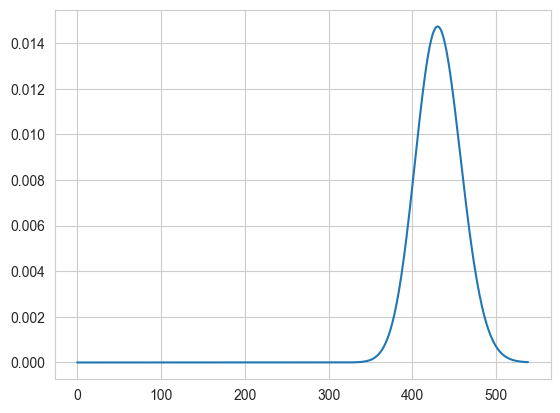

In [151]:
prior.plot()

In [152]:
print("Most likely number of honest members:", prior.idxmax())


Most likely number of honest members: 430


<Axes: >

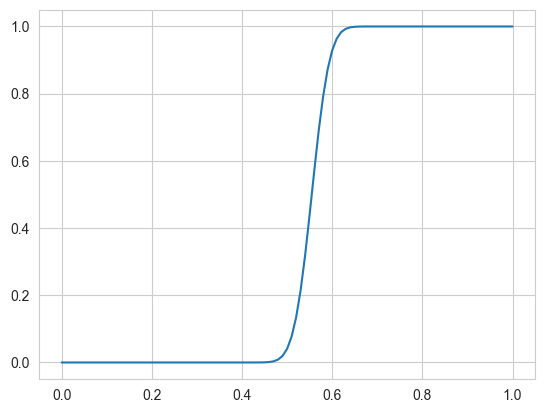

In [191]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250
from scipy.stats import binom

def update_binomial(pmf, data):
    '''Update pmf using the binomial dist'''
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()
update_binomial(pmf, data)

cumulative = pmf.cumsum()
cumulative[0.61]
cumulative.plot()

array(0.60890171)

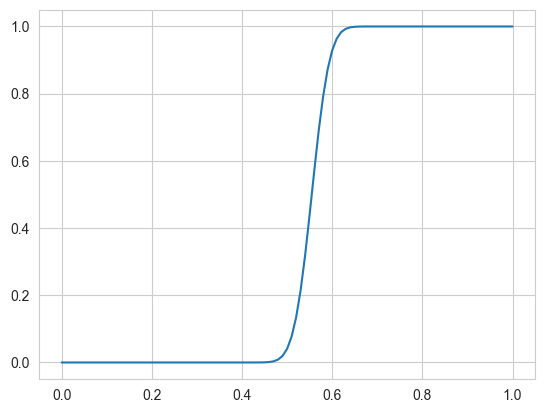

In [194]:



from scipy.interpolate import interp1d

ps = cumulative.values
qs = cumulative.index
interp = interp1d(ps, qs)
interp(0.96)

In [200]:
cdf = pmf.make_cdf()
cdf(0.615)

cdf.quantile(0.9638303)

array(0.61)

In [201]:
cdf.credible_interval(0.9)

array([0.51, 0.61])

In [202]:
pmf = cdf.make_pmf()

In [203]:
pmf

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,0.000000e+00
0.97,0.000000e+00
0.98,0.000000e+00
0.99,0.000000e+00


In [206]:
die = make_die(6)
dice =[die] * 3

pmf_3d6 = add_dist_seq(dice)

<Axes: >

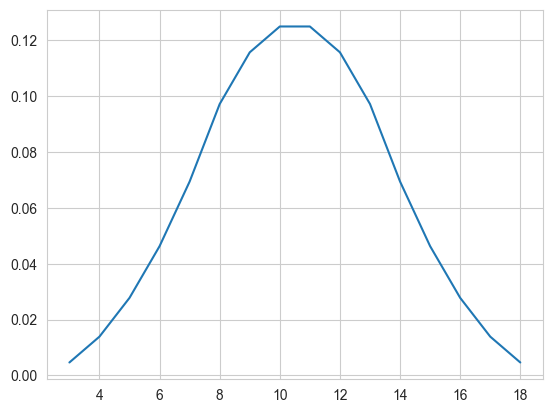

In [207]:
pmf_3d6.plot()

In [212]:
n = 10000
a = np.random.randint(1, 7, size = (n, 4))
a.sort(axis = 1)
t = a[:, 1:].sum(axis = 1)
pmf_best3 = Pmf.from_seq(t)
pmf_best3

,probs
3,0.0015
4,0.0031
5,0.0068
6,0.0161
7,0.0287
8,0.0490
9,0.0697
10,0.0983
11,0.1193
12,0.1306
